In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fmin_bfgs
plt.rcParams['axes.formatter.limits'] = [-3,3]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 1 Logistic Regression

## 1.1 Visualizing the Data

In [207]:
data = np.loadtxt('ex2_octave/ex2data1.txt', delimiter=',')
x, y = data[:,:2], data[:,2]

In [208]:
# to get an idea of what X looks like
x[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [209]:
# to get an idea of what y looks like
y[:5]

array([0., 0., 0., 1., 1.])

In [210]:
# insert column of ones for intercept/constant term
X = np.insert(x, 0, 1, axis=1)
print(X.shape, y.shape)

(100, 3) (100,)


In [211]:
# divide sample into two: ones with pos classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
# confirmation that everything is included
print(f'Included everything? {len(pos) + len(neg) == X.shape[0]}')

Included everything? True


In [212]:
def plotData():
    
    # plot positive (i.e., accepted) points
    plt.plot(pos[:, 1], pos[:, 2], '+', color='k', ms=7,
             mew=2, label=r'Admitted')
    
    # plot negative (i.e., not accepted) points
    plt.plot(neg[:, 1], neg[:, 2], 'o', color='y', ms=7,
            label=r'Not Admitted')
    
    # axes labels
    plt.xlabel(r'Exam 1 Score')
    plt.ylabel(r'Exam 2 Score')
    
    # add legend
    plt.legend(loc='best', fontsize=8, numpoints=1)
    
    # add grid
    plt.grid(True)

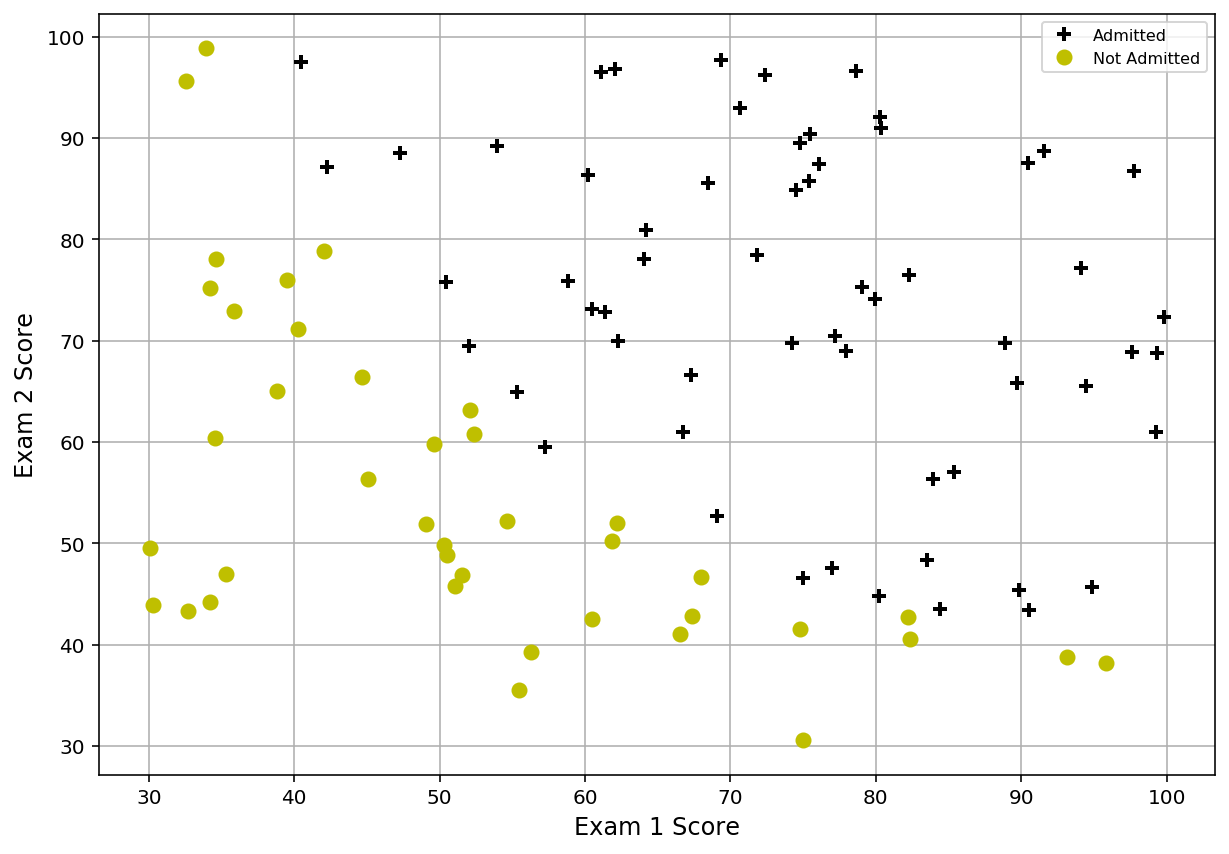

In [213]:
# plot the Data
plt.figure(figsize=(10,7))
plotData()

## 1.2 Implementation

### 1.2.1 Warmup Exercise: Sigmoid function

In [214]:
# vectorized sigmoid function
from scipy.special import expit

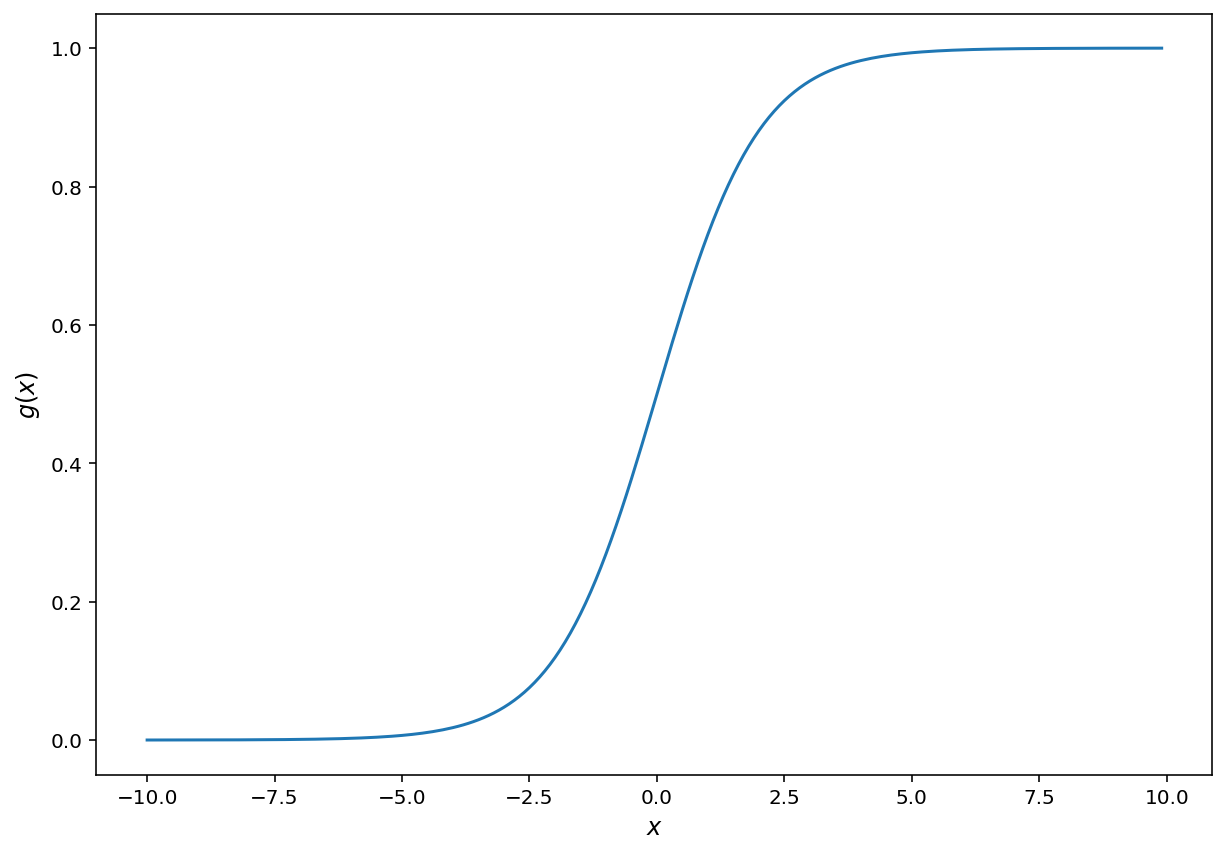

In [215]:
# make sure expit works
xx = np.arange(-10, 10, 0.1)
plt.figure(figsize=(10, 7))
plt.plot(xx, expit(xx))
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$');

### 1.2.2 Cost function and gradient

Here we will define auxiliary ```compute_cost``` and ```compute_grad``` functions to use in an overal ```costFunction```. We do this because we will need separate cost function and gradient functions when we use ```scipy.optimize``` in further exercises.

In [216]:
def my_compute_cost(theta, X, y):
    m = len(y)
    # compute hypothesis
    hypothesis = expit(np.dot(X, theta))
    # compute cost function in two terms
    cost0 = np.dot(np.log(hypothesis), y)
    cost1 = np.dot(np.log(1 - hypothesis), (1 - y))
    # cost function
    cost = -(1 / m) * (cost0 + cost1)
    return cost

def my_compute_grad(theta, X, y):
    # number of training examples
    m = len(y)
    # compute hypothesis
    hypothesis = expit(np.dot(X, theta))
    # gradient
    gradient = np.dot(X.T, (hypothesis - y)) / m
    return gradient

def my_cost_function(theta, X, y):
    # compute cost function J
    J = my_compute_cost(theta, X, y)
    # compute gradient given set of current parameters
    gradient = my_compute_grad(theta, X, y)
    return J, gradient

In [217]:
# setup the data matrix appropriately
m, n = x.shape

# initalize theta
initial_theta = np.zeros(n+1)

# compute and display initial cost and gradient
J, grad = my_cost_function(initial_theta, X, y)

print(f'Cost at initial theta (zeros): {J}')
print(f'Gradient at inital theta (zeros):\n {grad}')

Cost at initial theta (zeros): 0.6931471805599452
Gradient at inital theta (zeros):
 [ -0.1        -12.00921659 -11.26284221]


### 1.2.3 Learning parameters with ```scipy.optimize``` using BFGS

Here we are using the scipy BFGS implementation. We only need to give this
function the cost function, the initial parameters, and the gradient. This function
will return the values of theta that minimize the cost function.

In [218]:
theta_new = fmin_bfgs(
    my_compute_cost, initial_theta, fprime=my_compute_grad, maxiter=400, args=(X,y), disp=False
)

/Users/jairesearch/opt/anaconda3/envs/test123/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [219]:
print('Best fit theta: {0}'.format(theta_new))
print('Cost function at best fit theta: {0}'.format(my_compute_cost(theta_new, X, y)))

Best fit theta: [-25.16133284   0.2062317    0.2014716 ]
Cost function at best fit theta: 0.2034977015894438


### _Alternative: `scipy.optimize`_

In [220]:
from scipy import optimize

def optimize_theta(theta, X, y):
    result = optimize.fmin(
        my_compute_cost, x0=theta, args=(X, y), maxiter=400, full_output=True
    )
    return result[0], result[1]

In [221]:
theta, mincost = optimize_theta(initial_theta, X, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [222]:
# call my cost function using the optimal parameters of theta --> cost should be 0.203
print(my_compute_cost(theta, X, y))

0.2034977015902151


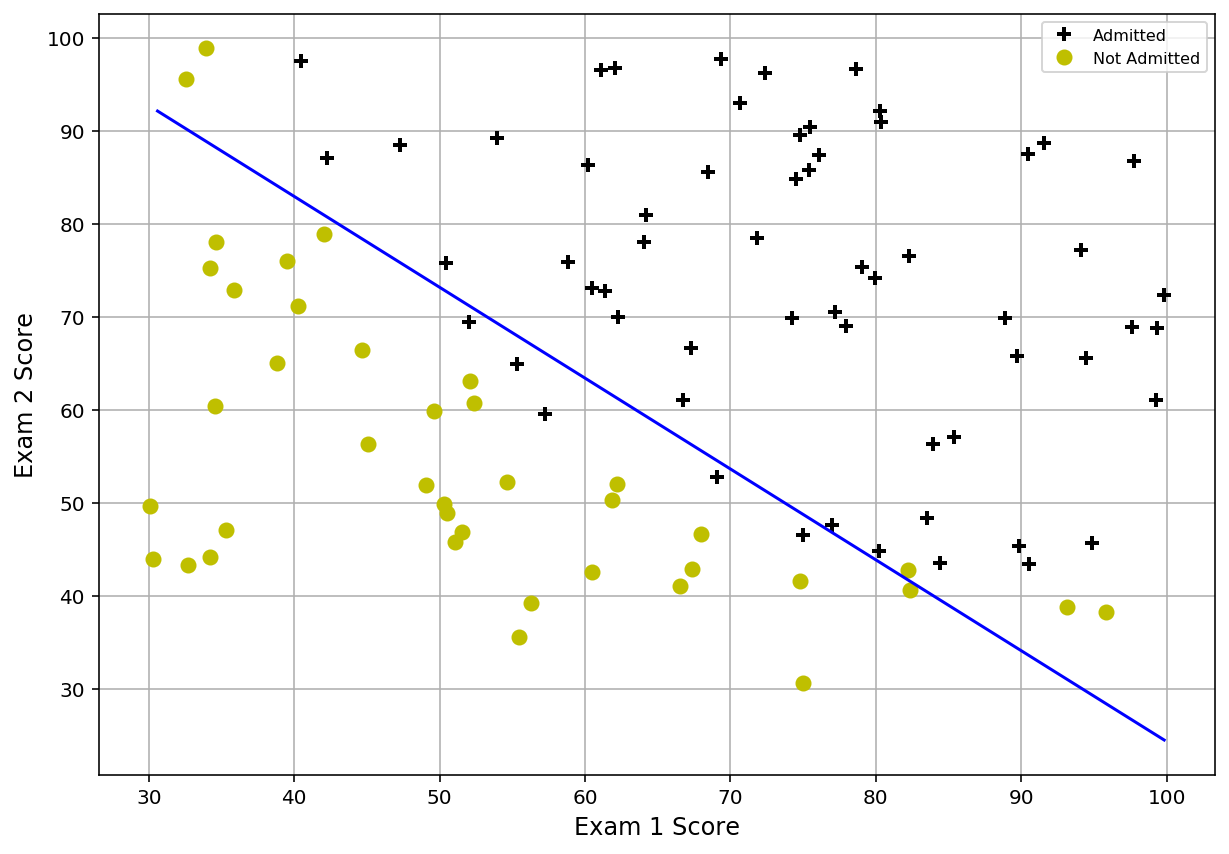

In [223]:
# plotting the decision boundary: two points, draw a line between them
boundary_x = np.array([np.min(x[:, 1]), np.max(X[:, 1])])
boundary_y = (- theta[0] - theta[2] * boundary_x) / theta[1] #np.array(-1. / theta[2]) * (theta[0] + theta[1] * boundary_x)
plt.figure(figsize=(10,7))
plotData()
plt.plot(boundary_x, boundary_y, 'b-', label='Decision Boundary');

### 1.2.4 Evaluating Logistic Regression

In [224]:
# exam1 score of 45 and exam2 score of 85
vals = np.array([45, 85])
vals = np.hstack((np.array([1]), vals))

prob = expit(np.dot(theta_new, vals))

print(f'Probablity of acceptance for exam 1 score: {vals[1]} and exam 2 score: \
{vals[2]} is {prob*100} percent.')

Probablity of acceptance for exam 1 score: 45 and exam 2 score: 85 is 77.62907240588946 percent.


In [225]:
def predict(theta, X):
    
    htheta = expit(np.dot(X, theta))
    
    return np.array([1 if h > 0.5 else 0 for h in htheta])

In [226]:
# get prediction for training set
p = predict(theta_new, X)

# get training accuracy
print(f'Training Accuracy: {np.mean(p==y)*100}')

Training Accuracy: 89.0


# 2 Regularized logistic regression

## 2.1 Visualizing the data

In [251]:
# read in data set 2
data = np.loadtxt('ex2_octave/ex2data2.txt', delimiter=',')
x, y = data[:,:2], data[:,2]

# setup the data matrix appropriately
m, n = x.shape

# add intercept term to X
X = np.hstack((np.ones((m, 1)), x))

In [252]:
# divide positive classifications from null classifications
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

In [253]:
def plotData2(pos, neg):
    
    # plot positive (i.e., accepted) points
    plt.plot(pos[:, 1], pos[:, 2], '+', color='k', ms=7,
             mew=2, label=r'Accepted')
    
    # plot negative (i.e., not accepted) points
    plt.plot(neg[:, 1], neg[:, 2], 'o', color='y', ms=7,
            label=r'Rejected')
    
    # axes labels
    plt.xlabel(r'Microchip test 1')
    plt.ylabel(r'Microchip test 2')
    
    # add legend
    plt.legend(loc='best', fontsize=8, numpoints=1)
    plt.grid(True)

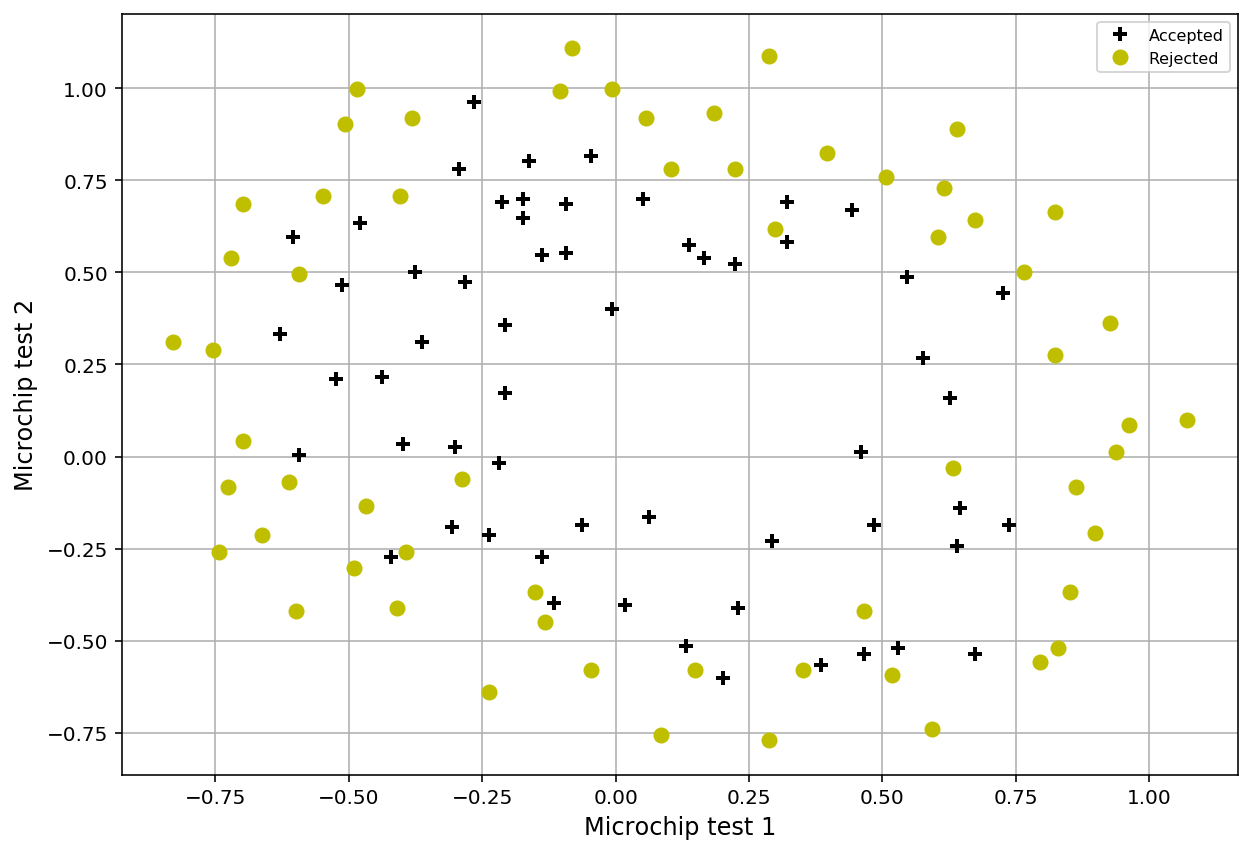

In [254]:
plt.figure(figsize=(10, 7))
plotData2(pos, neg)

## 2.2 Feature Mapping

In [255]:
def mapFeature(x1col, x2col, degrees=6):
    
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack((out, term))
    return out

In [256]:
# get full array of features
X = mapFeature(X[:,1], X[:,2])
X.shape

(118, 28)

In [257]:
y.shape

(118,)

## 2.3 Cost function and gradient

In [258]:
def reg_compute_cost(theta, X, y, lamb):
    # array of lambdas
    lambarray = np.ones(len(theta)) * lamb
    # zero out first element - don't regularize constant term
    lambarray[0] = 0.0
    # number of training examples
    m = len(y)
    # compute hypothesis
    hypothesis = expit(np.dot(X, theta))
    # compute cost in three terms
    term1 = np.dot(np.log(hypothesis), y)
    term2 = np.dot(np.log(1 - hypothesis), (1 - y))
    termreg = (1 / 2) * np.sum(lambarray * theta ** 2)
    # cost function 
    cost = - (1 / m) * (term1 + term2 - termreg)
    return cost

def reg_compute_grad(theta, X, y, lamb):
    # array of lambdas
    lambarray = np.ones(len(theta)) * lamb
    # zero out first element
    lambarray = 0.0
    # number of training samples
    m = len(y)
    # compute hypothesis
    hypothesis = expit(np.dot(X, theta))
    # gradient 
    gradient = (np.dot(X.T, (hypothesis - y)) + lambarray * theta) / m
    return gradient

def reg_cost_function(theta, X, y, lamb):
    cost = reg_compute_cost(theta, X, y, lamb)
    gradient = reg_compute_grad(theta, X, y, lamb)
    return cost, gradient

In [259]:
# initial theta
initial_theta = np.zeros(X.shape[1])

# set regularization parameter to 1
lamb = 1

# compute init cost and gradient
cost, gradient = reg_cost_function(initial_theta, X, y, lamb)

print(cost)
print(gradient)

0.6931471805599453
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


### 2.3.1 Learning parameters with ```scipy.optimize``` using BFGS

In [260]:
# call scipy.optimize BFGS function
theta_new_reg = fmin_bfgs(reg_compute_cost, initial_theta, fprime=reg_compute_grad,
                          maxiter=500, args=(X, y, lamb), disp=False)

In [261]:
print('Best fit theta: {0}'.format(theta_new_reg))
print('Cost function at best fit theta: {0}'.format(my_compute_cost(theta_new_reg, X, y)))

Best fit theta: [ 0.84567239 -0.30428415  0.54040048 -1.58900191 -0.44335584 -0.93492447
 -0.43715453 -0.21288455 -0.2587878  -0.50170165 -1.29694602 -0.06984691
 -0.4157031  -0.11856825 -1.13021685 -0.56998687 -0.14076773 -0.09685924
 -0.18375006 -0.15892989 -0.84507166 -1.02459336 -0.02746323 -0.21216288
 -0.00925883 -0.23675309 -0.05446503 -1.15275256]
Cost function at best fit theta: 0.5443016431648159


### _Alternative: `scipy.optimize`_

In [262]:
def optimized_regularized_theta(theta, X, y, lamb):
    result = optimize.minimize(reg_compute_cost, theta, args=(X, y, lamb), method='BFGS', options={'maxiter':500, 'disp':True})
    return np.array([result.x]), result.fun

In [264]:
theta, mincost = optimized_regularized_theta(initial_theta, X, y, lamb)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48


In [269]:
def plotBoundary(theta, X, y, lamb):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimized_regularized_theta(theta, X, y, lamb)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d' % lamb}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 0
         Function evaluations: 30
         Gradient evaluations: 1


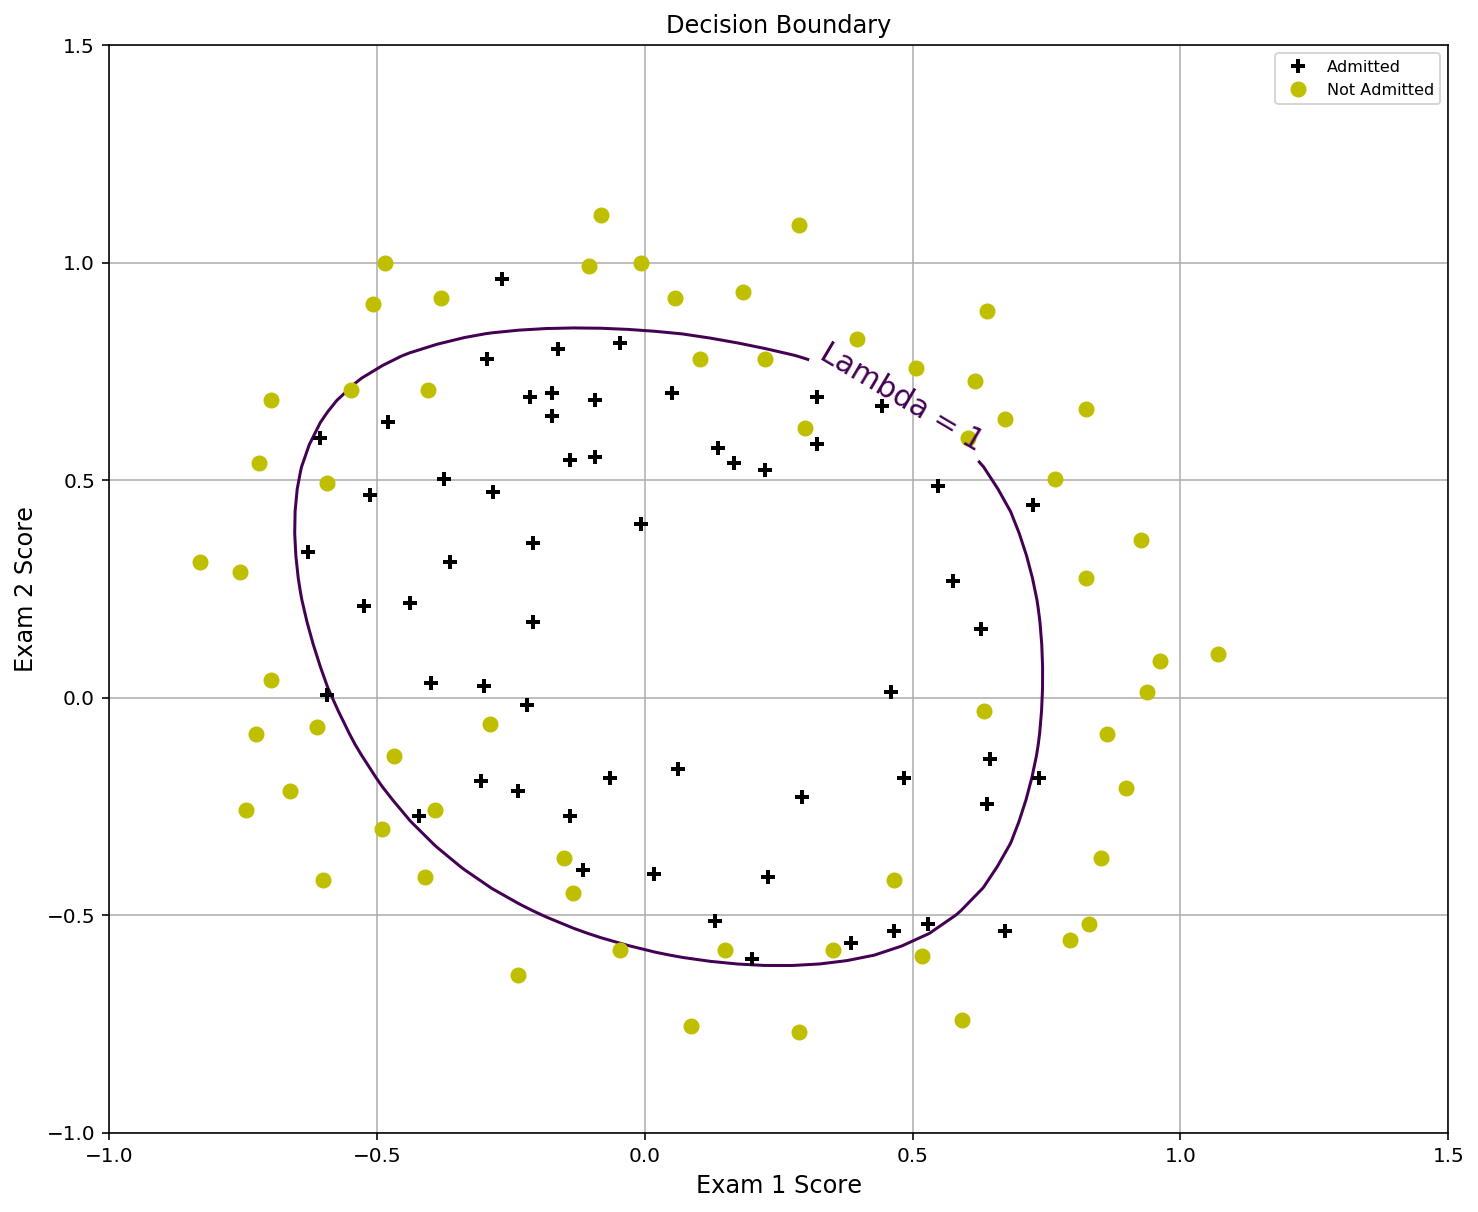

In [270]:
plt.figure(figsize=(12,10))
plotData()
plotBoundary(theta , X, y, lamb)

## 2.5 Varying the Regularization parameter

         Current function value: 0.240180
         Iterations: 500
         Function evaluations: 15210
         Gradient evaluations: 507
Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 0
         Function evaluations: 30
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 23
         Function evaluations: 720
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 8
         Function evaluations: 270
         Gradient evaluations: 9


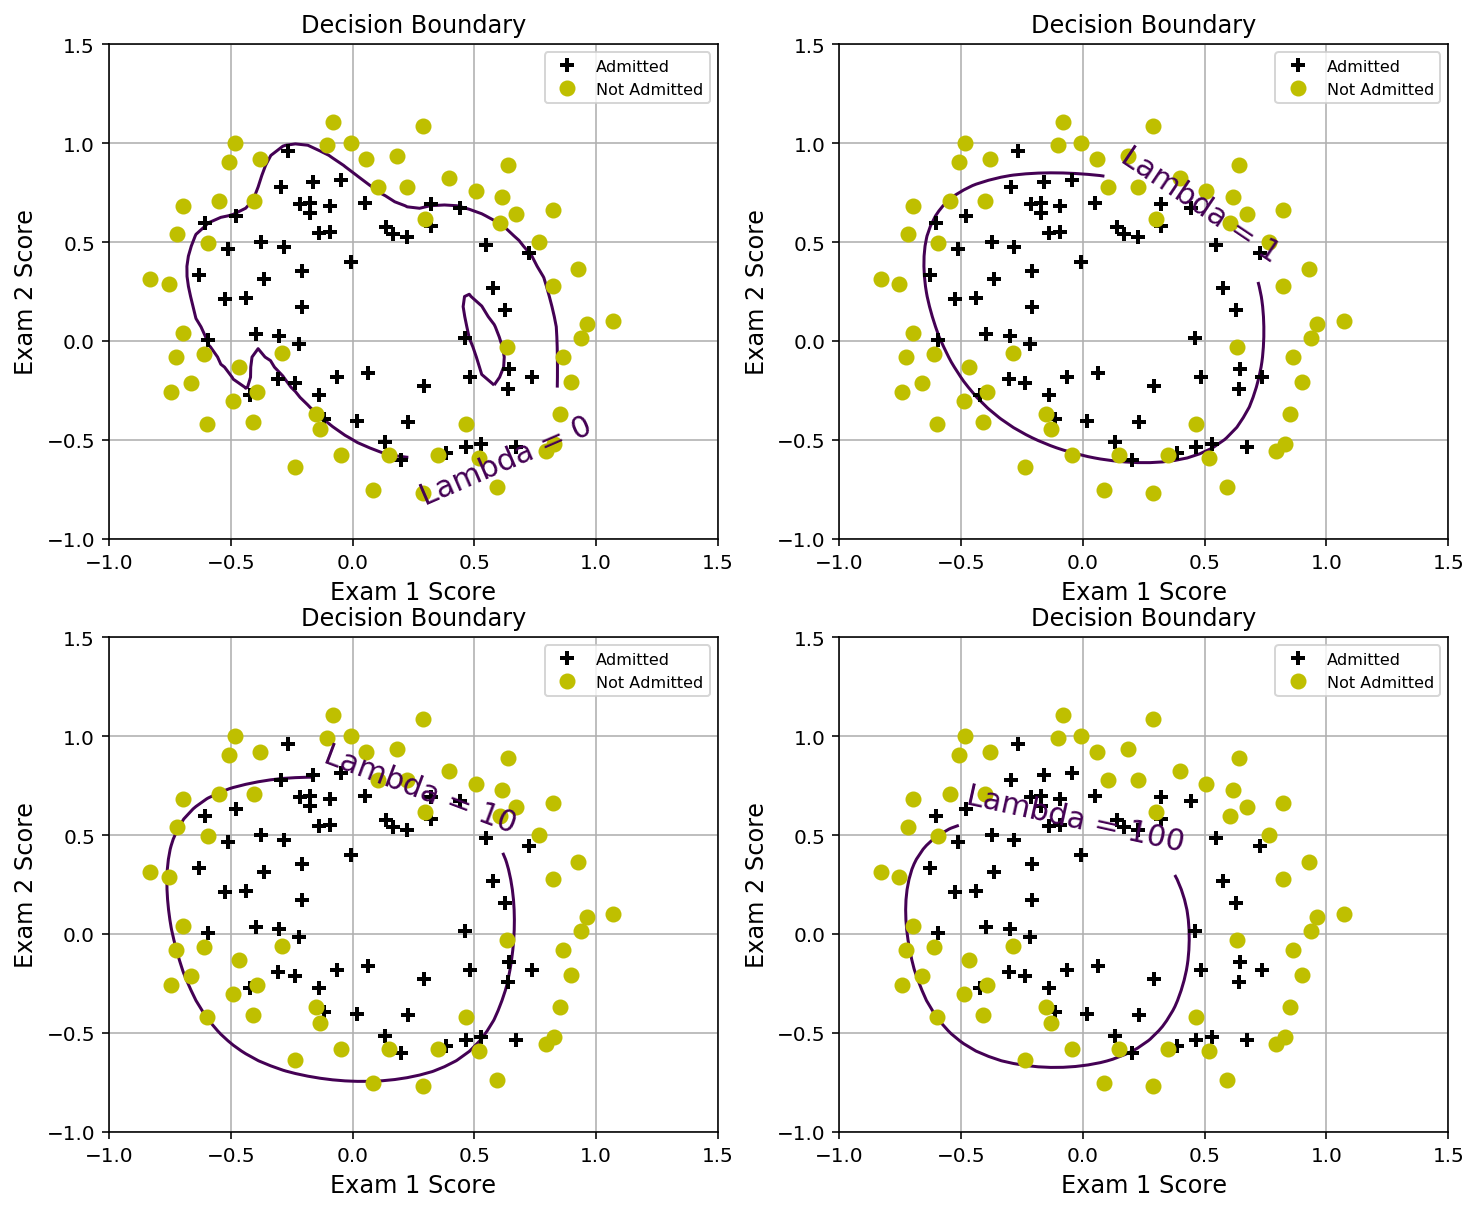

In [275]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta, X, y, 0.)

plt.subplot(222)
plotData()
plotBoundary(theta, X, y, 1.)

plt.subplot(223)
plotData()
plotBoundary(theta, X, y, 10.)

plt.subplot(224)
plotData()
plotBoundary(theta, X, y, 100.)

In [27]:
print X.shape, y.shape

(118, 28) (118,)
